In [2]:
# Import libraries

import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import differential_evolution
from joblib import Parallel, delayed

# 2HDM with $Z_2$ symmetry

In [3]:
dim = 1000 # Number of (pseudo-)random numbers.

# The idea is to generate some (pseudo-)random numbers so as to find which combination is valid, in light of the analysis presented in the Master' Thesis associated with this code.

rho_3 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_4 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_5 = np.random.default_rng().uniform(0,5,dim) # rho_5 is |rho_5|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

gamma = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_5.

In [4]:
def search_minimum_values(rho_3_param,rho_4_param,rho_5_param,dim_parameter,epsilon):

    # This function finds the valid values for the parameters of the 2HDM potential.

    r2 = np.linspace(0,1,200) # r2 is r^2, which takes values from 0 to 1.
    cosine_gamma_plus_beta = np.linspace(-1,1,200) # cosine_gamma_plus_beta is cos(γ+β), whose values vary from -1 to 1.
    x = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    y = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    #
    rho_3_eff_min_valid = []
    rho_3_eff = np.zeros((len(r2),len(cosine_gamma_plus_beta)))
    rho_3_eff_min = np.zeros(dim_parameter)
    #
    for k in range(0,dim_parameter):
        #
        for i in range(0,len(r2)):
            for j in range(0,len(cosine_gamma_plus_beta)):
                rho_3_eff[i,j] = rho_3_param[k]+r2[i]*(rho_4_param[k]+rho_5_param[k]*cosine_gamma_plus_beta[j])
        #
        rho_3_eff_min[k] = np.min(rho_3_eff)
        V = (1/2)*x**2+(1/2)*y**2+rho_3_eff_min[k]*x*y
        #
        if np.min(V) >= -epsilon: ##The minus sign is to include 0.
            rho_3_eff_min_valid.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(rho_3_eff_min[k])])
            
            # It is possible to use the following code in order to work with np.float64:
            # rho_3_eff_min_valid.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],rho_3_eff_min[k]])
    #
    if not rho_3_eff_min_valid == []:
        return rho_3_eff_min_valid # First element: rho_3, Second element: rho_4, Third element: |rho_5|, Fourth element: rho_3_eff_min.
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')

In [5]:
# Results

valid_values = search_minimum_values(rho_3,rho_4,rho_5,dim,10**(-5))
valid_values

[[1.9902927402809487,
  -0.1323520019207658,
  2.286087427476653,
  -0.42814668911647],
 [4.98713317251431, -1.319814733874737, 2.249283318080724, 1.4180351205588493],
 [3.3528536944239598,
  -0.9300214678153154,
  1.332122167465854,
  1.0907100591427903],
 [4.515331614726353, 3.693286538088671, 0.5400758032828012, 4.515331614726353],
 [3.444906149243204, 3.043792506846355, 1.861240347176163, 3.444906149243204],
 [0.159451400532296,
  0.229810199829954,
  0.9429270068102041,
  -0.5536654064479541],
 [1.6629193740221009,
  2.637374619856132,
  2.281331954105636,
  1.6629193740221009],
 [1.2889891446398805,
  1.9438089979923214,
  0.06835047030408936,
  1.2889891446398805],
 [2.606227026730423,
  1.7098627886047613,
  0.44740605118036125,
  2.606227026730423],
 [3.2111969217419567,
  -2.216944099606599,
  1.583711034343822,
  -0.5894582122084646],
 [-0.24780514426466738,
  2.992634048671972,
  3.089731037520772,
  -0.3449021331134672],
 [0.9199040691579805,
  2.0551734991113104,
  1.7443

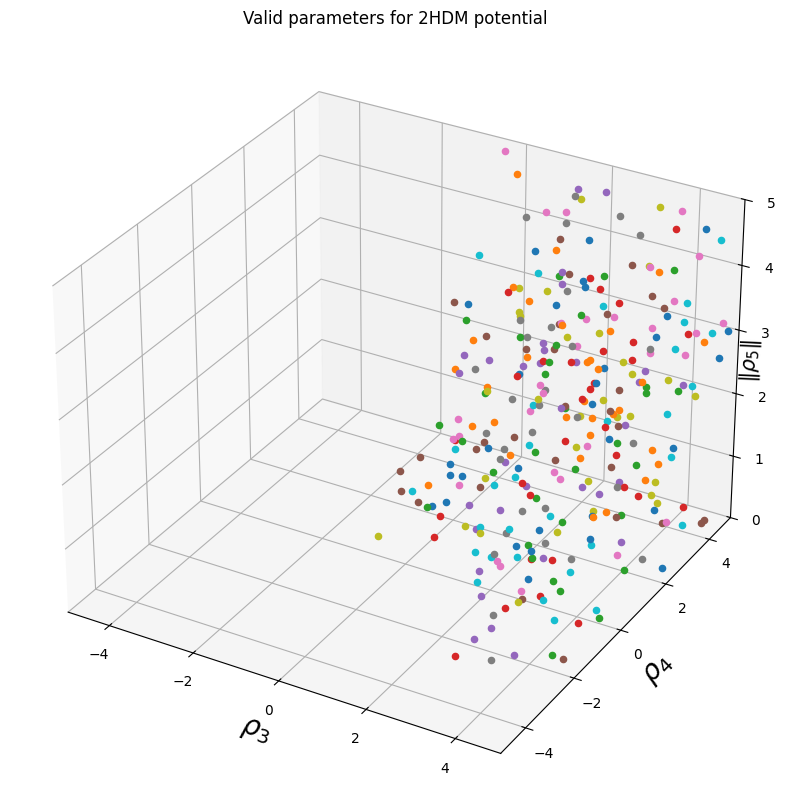

In [6]:
# Plot of the results

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(valid_values)-1,len(valid_values)):
    #
    ax.scatter(valid_values[int(point)][0],valid_values[int(point)][1],valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

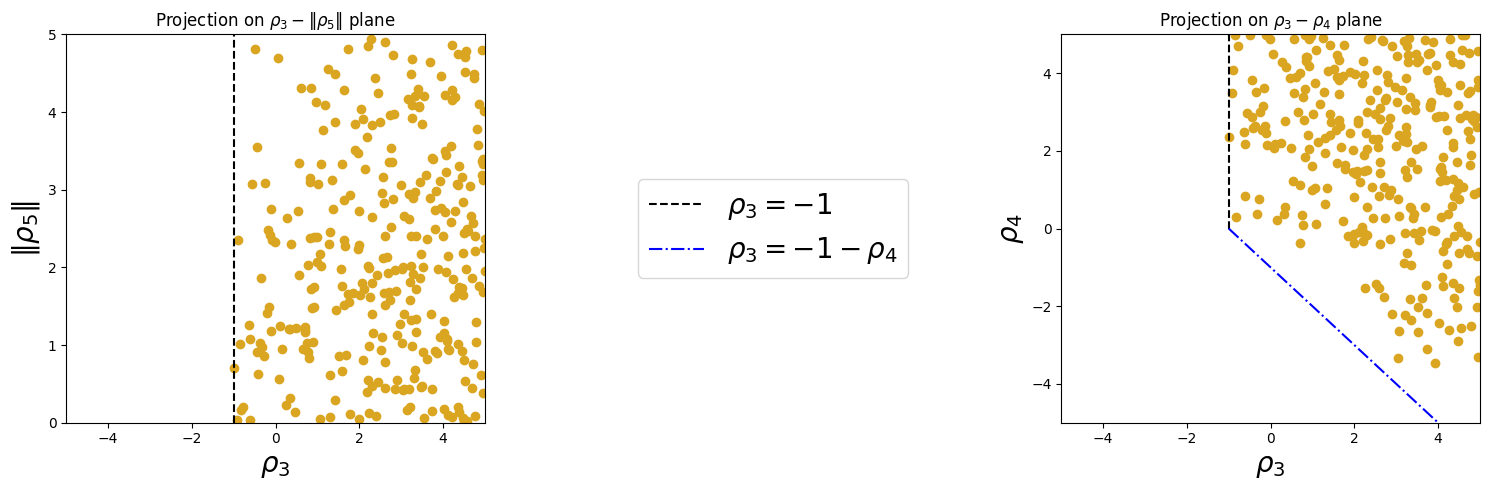

In [7]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][2],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][1],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [8]:
# Check!

search_minimum_values([0],[0],[0],1,10**(-5))

# As rho_3=rho_4=rho_5=0, then rho_3_eff_min=0, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[0.0, 0.0, 0.0, 0.0]]

In [9]:
# Check!

search_minimum_values([-2],[0],[0],1,10**(-5))

# As rho_3=-2 and rho_4=rho_5=0, then rho_3_eff_min=-2, which is NOT greater than -1, so this values are NOT valid (Error message arises).

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [10]:
# Check!

search_minimum_values([1],[0],[0],1,10**(-5))

# As rho_3=1 and rho_4=rho_5=0, then rho_3_eff_min=1, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[1.0, 0.0, 0.0, 1.0]]

# 2HDM without $Z_2$ symmetry

In [39]:
dim = 100

# Same parameters as above.

rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)

rho_6 = np.random.default_rng().uniform(0,5,dim) # rho_6 is |rho_6|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

alpha = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_6.

rho_7 = np.random.default_rng().uniform(0,5,dim) # rho_7 is |rho_7|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 #Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

xi = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_7.

In [40]:
def search_minimum_values_for_Z2_violating_2HDM(rho_3_param,rho_4_param,rho_5_param,gamma_param,rho_6_param,alpha_param,rho_7_param,xi_param,dim_param,epsilon_2):

    # The idea here is similar to the previous one but with much more parameters.

    r = np.linspace(0,1,50)
    beta = np.linspace(0,4*np.pi,50)
    chi = np.linspace(0,np.pi/2,50)
    #
    minimum_for_all = []
    V = np.zeros((len(r),len(beta),len(chi)))
    #
    for k in range(0,dim_param):
        #
        for i in range(0,len(r)):
            for j in range(0,len(beta)):
                for w in range(0,len(chi)):
                    V[i,j,w] = 2+((rho_3_param[k]+r[i]**2*(rho_4_param[k]+np.abs(rho_5_param[k])*np.cos(gamma_param[k]+beta[j])))-1)*(np.sin(2*chi[w]))**2+np.sin(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])+np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])+np.cos(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])-np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])))
        #
        if np.min(V) >= -epsilon_2:
            minimum_for_all.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(gamma_param[k]),float(rho_6_param[k]),float(alpha_param[k]),float(rho_7_param[k]),float(xi_param[k]),float(np.min(V))])
            
             # It is possible to use the following code in order to work with np.float64:
             # minimum_for_all.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],gamma_param[k],rho_6_param[k],alpha_param[k],rho_7_param[k],xi_param[k],np.min(V)])
    #
    if not minimum_for_all == []:
        return minimum_for_all
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')
    

In [41]:
# Results

search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))

[[4.01763886146243,
  4.8201054031141375,
  1.4841522468040473,
  5.266348302039754,
  0.39123597515283715,
  5.538314358438186,
  0.1944598945451731,
  1.7241950258213468,
  1.987043639440371],
 [1.37596015110939,
  3.7418071728468547,
  0.9702435710025364,
  5.5787439455150265,
  0.5279221213726532,
  4.768731879528322,
  2.2941587320263155,
  4.452119944094386,
  0.5956548074986299],
 [4.91150091953185,
  -0.6685876082208528,
  0.8189773184939908,
  5.158134483739025,
  0.26188435483803896,
  5.356137388695744,
  1.638128235718221,
  1.0716813797437785,
  1.0894297070085652],
 [4.536567978671149,
  4.37380168539905,
  3.8561532115405175,
  2.874552105586029,
  1.1547695029780258,
  0.5306131185364951,
  2.0101157511091303,
  1.318491494633864,
  1.6522475894061919],
 [-0.8722622630714376,
  1.1364384444593814,
  1.1395181417991351,
  5.009171455963559,
  1.3878641328276493,
  2.6723527584780467,
  1.2512093005531932,
  5.812237400943926,
  0.04386529255825164],
 [4.975936508238339,


In [ ]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([0],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([0],[0],[0],1,10**(-5))

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0010273036248318]]

In [ ]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([-2],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([-2],[0],[0],1,10**(-5))

# NOTE: This code might consider rho_3=-1 as a valid value because it is a limit case

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [ ]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([1],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([1],[0],[0],1,10**(-5))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]]

In [ ]:
# Due to the fact that this method implies a heavy calculation, another method is presented below.

name_parameter = ['rho_3', 'rho_4', 'rho_5', 'gamma', 'rho_6', 'alpha', 'rho_7', 'xi']
name_function_variables = ['r', 'beta', 'chi']
num_parameter = len(name_parameter)
num_functiion_variables = len(name_function_variables)


function_variable_regions = [(0, 1),         # r
                             (0, 4*np.pi),   # beta
                             (0, np.pi/2)]   # chi

def generate_random_params(number, limits):

    limits = np.array(limits)  
    lower_limit = limits[:, 0]  
    upper_limit = limits[:, 1]  

    return np.random.uniform(lower_limit, upper_limit, size=(number, len(limits)))

# Define the Z2-violating potential
def V_Z2_less(parameters, function_variables):
    rho_3_param, rho_4_param, rho_5_param, gamma_param, rho_6_param, alpha_param, rho_7_param, xi_param = parameters
    r, beta, chi = function_variables
    return 2+((rho_3_param+r**2*(rho_4_param+np.abs(rho_5_param)*np.cos(gamma_param+beta)))-1)*(np.sin(2*chi))**2+np.sin(2*chi)*(np.abs(rho_6_param)*r*np.cos(alpha_param+(1/2)*beta)+np.abs(rho_7_param)*r*np.cos(xi_param+(1/2)*beta)+np.cos(2*chi)*(np.abs(rho_6_param)*r*np.cos(alpha_param+(1/2)*beta)-np.abs(rho_7_param)*r*np.cos(xi_param+(1/2)*beta)))

# Minimize the potential in (r, beta, chi) space
def minimize_dependent_params(parameters, bounds):
    def minimize_single(parameter):
        def objective(function_variables):
            return V_Z2_less(parameter, function_variables)
        
        # Scipy native function
        res = differential_evolution(objective, bounds=bounds, strategy='best1bin', tol=1e-6)
        return np.concatenate([parameter, res.x, [res.fun]])

    # Parallel processing
    results = Parallel(n_jobs=-1)(delayed(minimize_single)(parameter) for parameter in parameters)
    
    return results

<div class="alert alert-block alert-info">
⚠️ The function minimize_dependent_params uses parallel processing to compute the calculation. The number of CPU cores selected by default is n_jobs=-1, which means that the computer will use EVERY core (CPU usage 100%) at the same time. This parameter can be changed as desired (for example, n_jobs=4 will just use 4 CPU cores).
</div>

In [ ]:
# We first test this method for the Z_2-conserving potential

dim = 10000

regions = [(-5, 5),         # rho_3
           (-5, 5),         # rho_4
           (0, 5),          # |rho_5|
           (0, 2*np.pi),    # gamma
           (0, 0),          # |rho_6|
           (0, 0),    # alpha
           (0, 0),          # |rho_7|
           (0, 0)]    # xi

# Generate random parameters
parameters = generate_random_params(dim, regions)

# Minimize the function and filter the results with V > 0
results = np.array(minimize_dependent_params(parameters, function_variable_regions))
new_valid_values = results[results[:, -1] > 0]

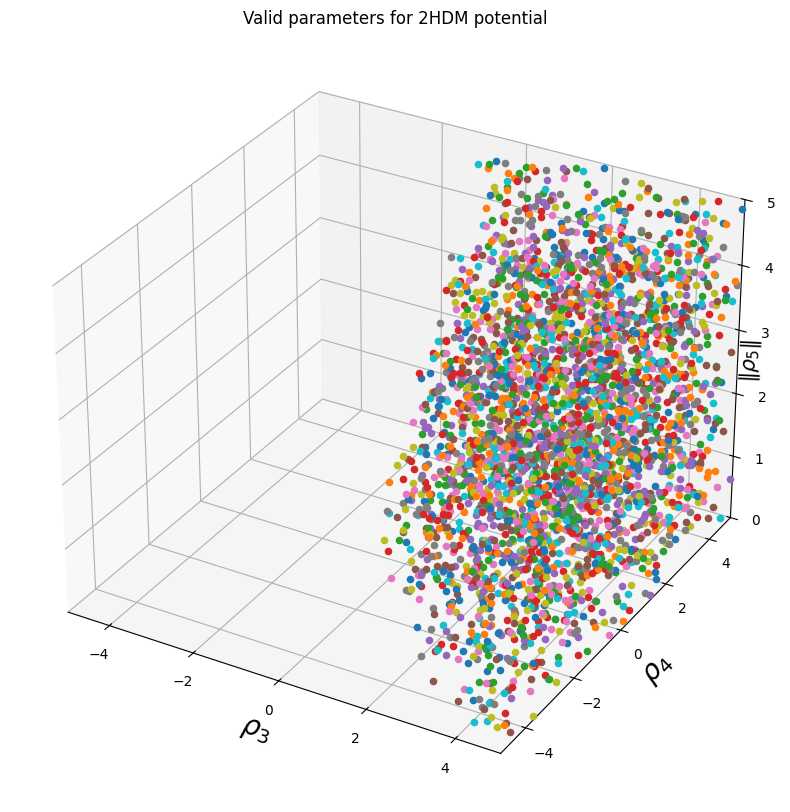

In [ ]:
# Plot of the results


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(new_valid_values)-1,len(new_valid_values)):
    #
    ax.scatter(new_valid_values[int(point)][0],new_valid_values[int(point)][1],new_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

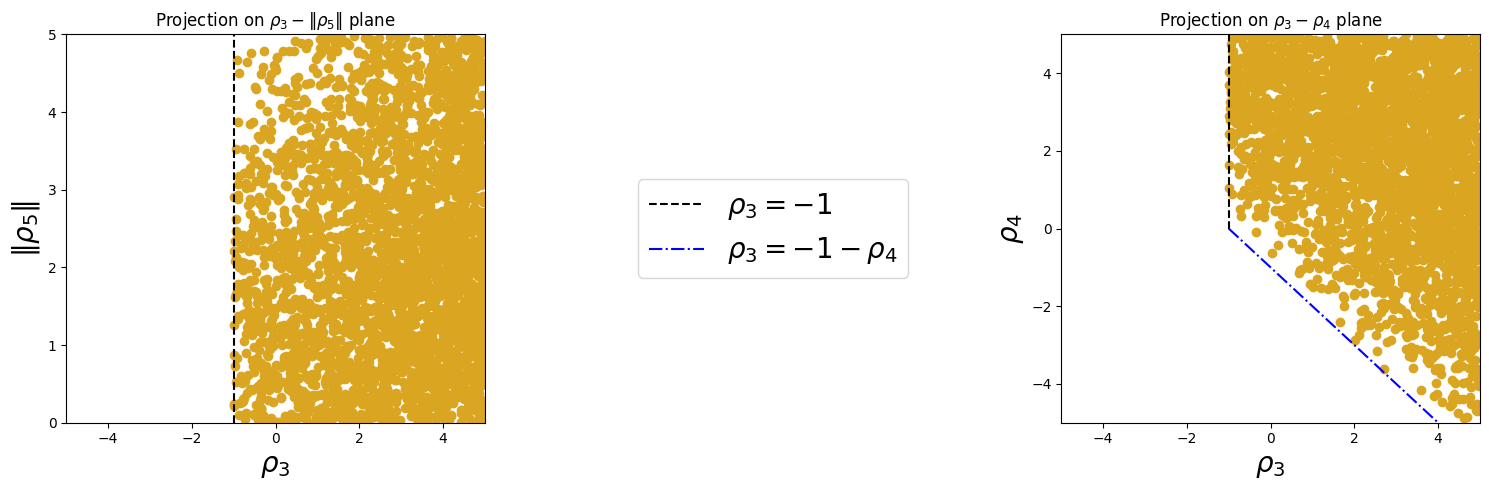

In [131]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

ax.scatter(new_valid_values[:,0], new_valid_values[:,2],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

ax.scatter(new_valid_values[:,0], new_valid_values[:,1],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [ ]:
# Explore Z_2-violating 2HDM results

dim = 10000

regions = [(-5, 5),         # rho_3
           (-5, 5),         # rho_4
           (0, 5),          # |rho_5|
           (0, 2*np.pi),    # gamma
           (0, 5),          # |rho_6|
           (0, 2*np.pi),    # alpha
           (0, 5),          # |rho_7|
           (0, 2*np.pi)]    # xi

# Generate random parameters
parameters = generate_random_params(dim, regions)

# Minimize the function and filter the results with V > 0
results = np.array(minimize_dependent_params(parameters, function_variable_regions))
Z2_violating_valid_values = results[results[:, -1] > 0]

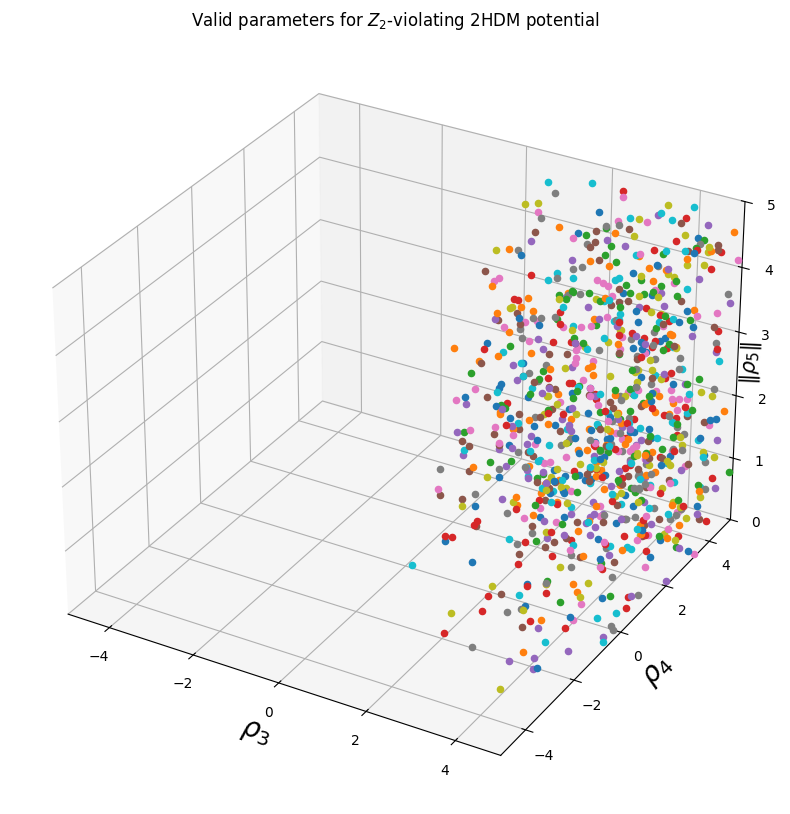

In [ ]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(Z2_violating_valid_values)-1,len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0],Z2_violating_valid_values[int(point)][1],Z2_violating_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for $Z_2$-violating 2HDM potential')

plt.show()

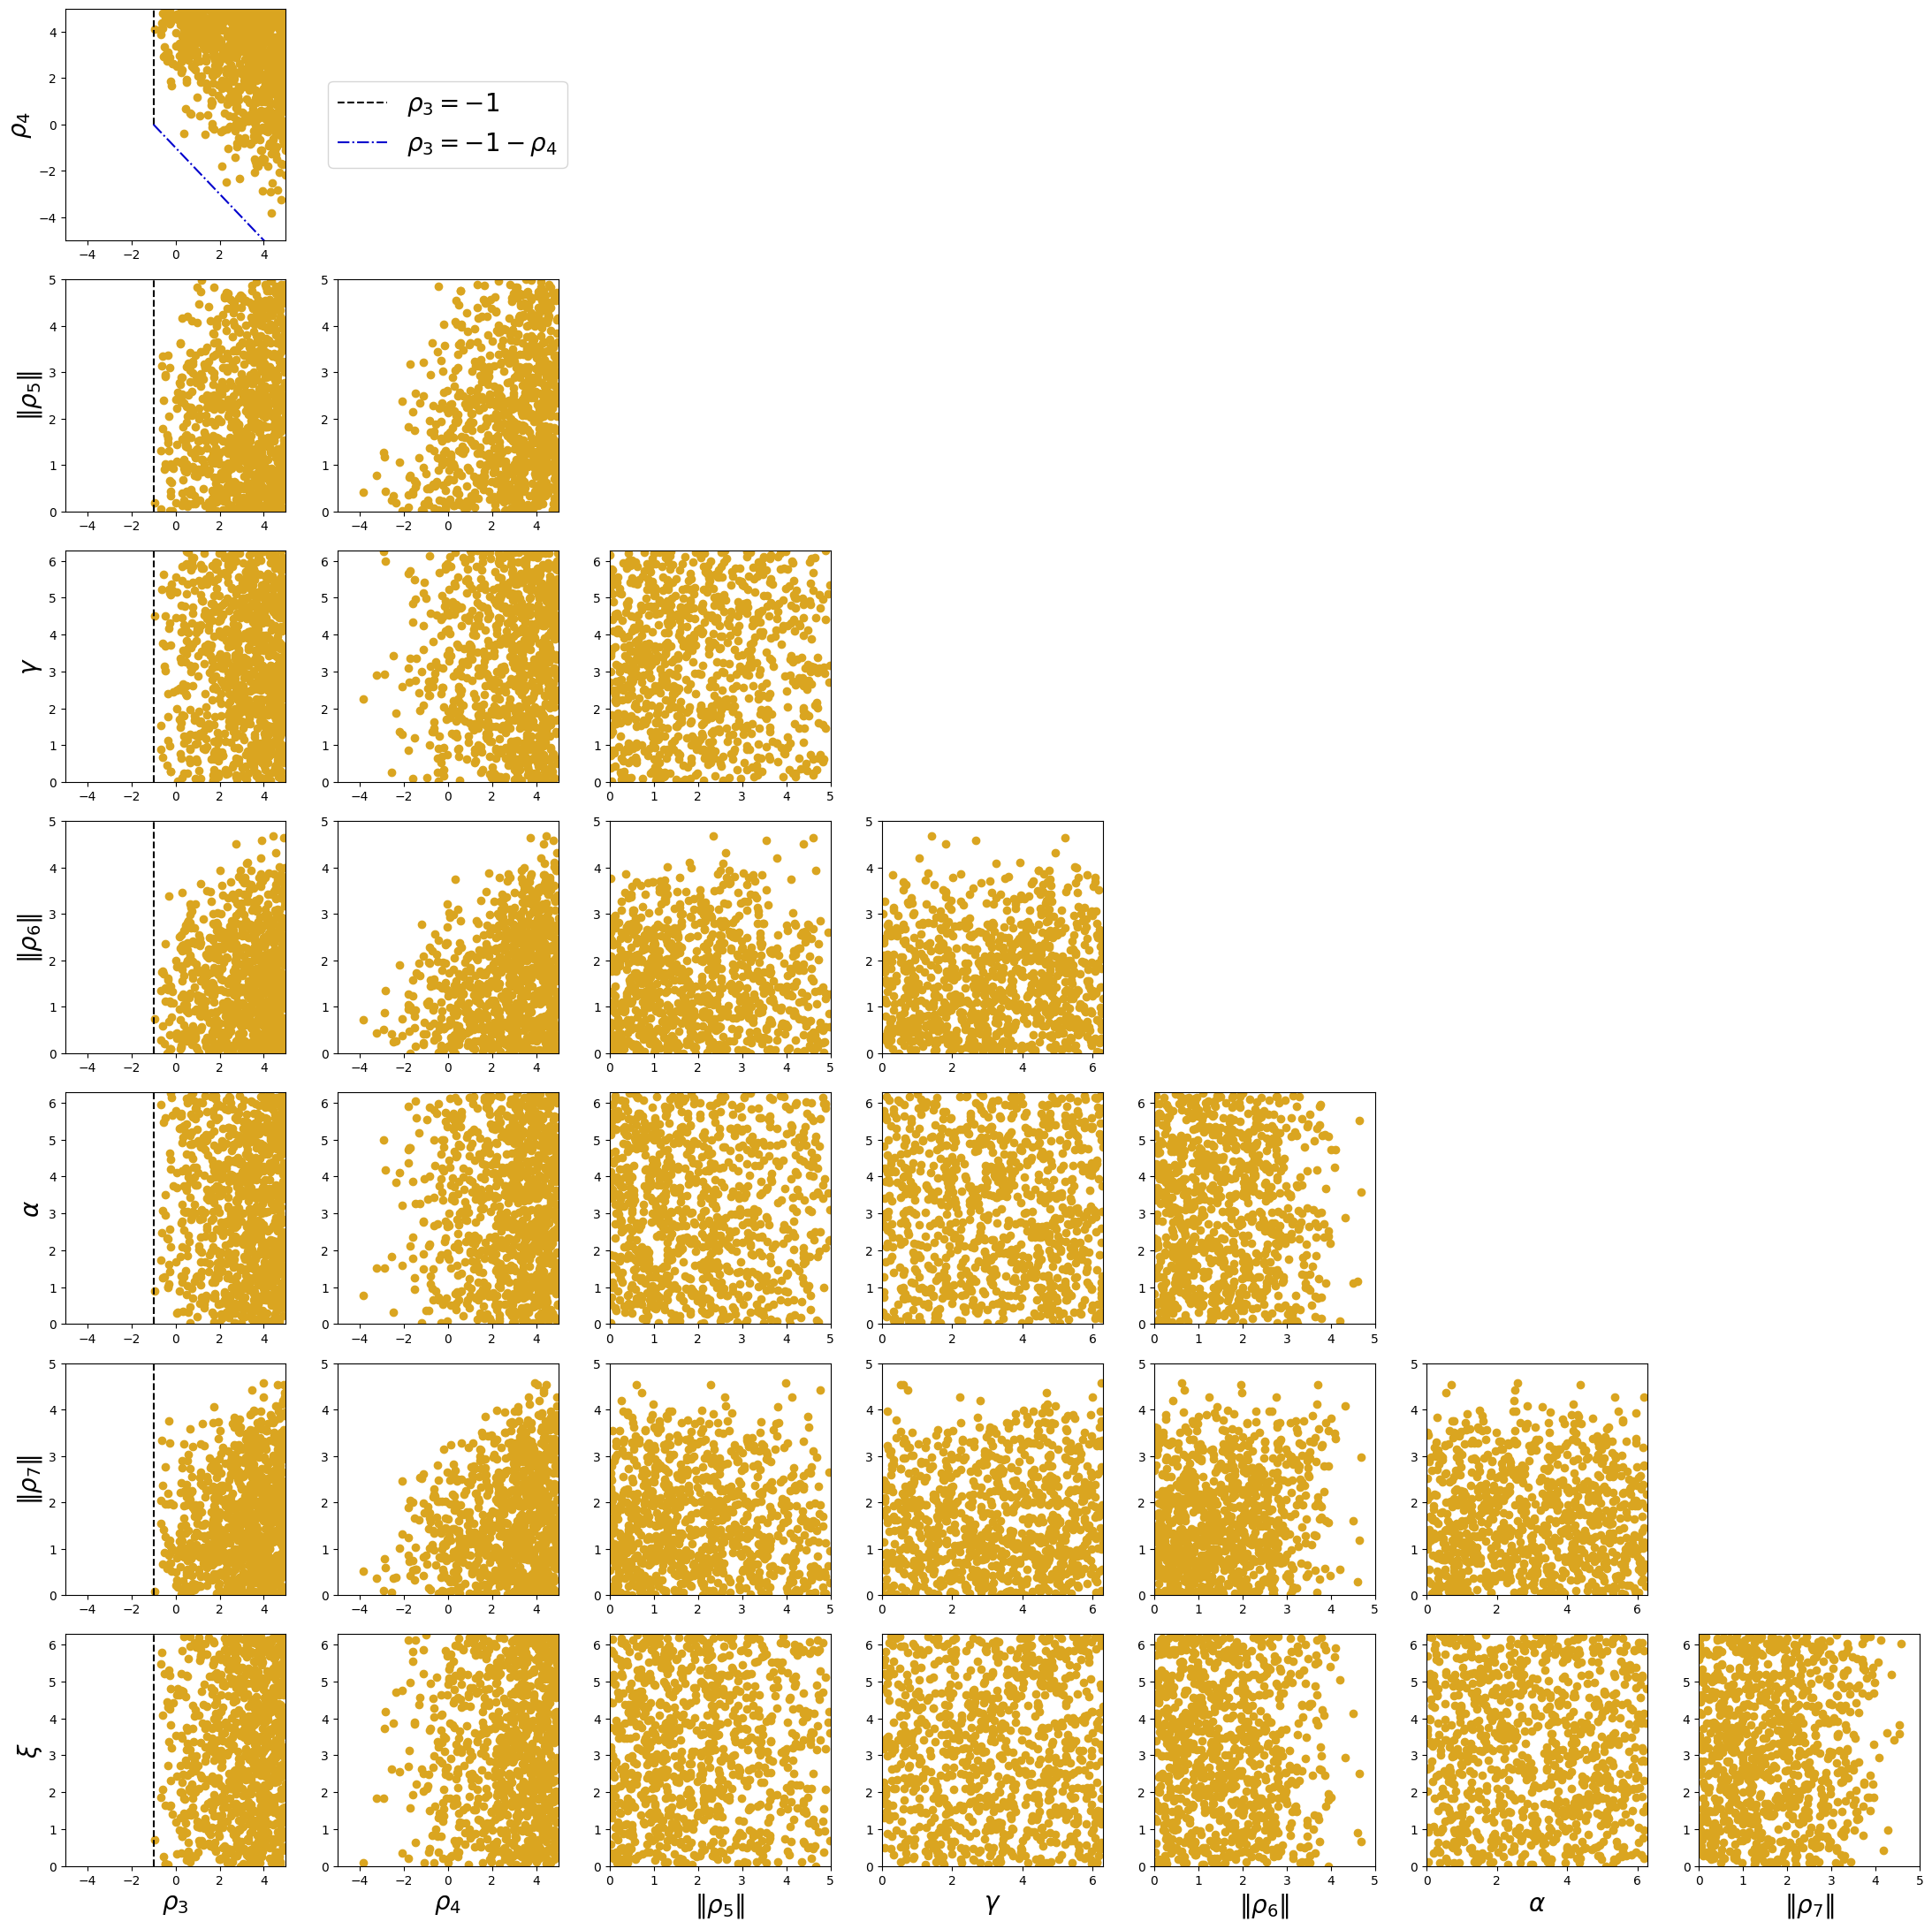

In [ ]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,1], color='goldenrod')

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='mediumblue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,2],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,2],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,3],color='goldenrod')

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,3],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,3],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

ax.scatter(Z2_violating_valid_values[:,4], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

ax.scatter(Z2_violating_valid_values[:,4], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

ax.scatter(Z2_violating_valid_values[:,5], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

ax.scatter(Z2_violating_valid_values[:,4], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

ax.scatter(Z2_violating_valid_values[:,5], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

ax.scatter(Z2_violating_valid_values[:,6], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='mediumblue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

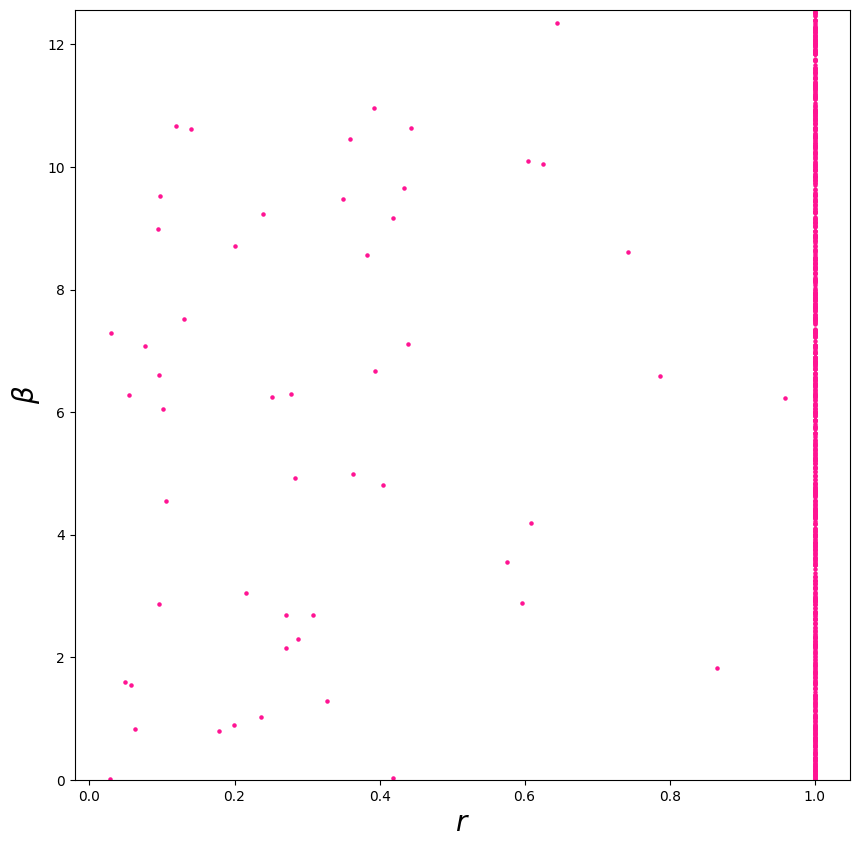

In [134]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1)

ax.scatter(Z2_violating_valid_values[:,8], Z2_violating_valid_values[:,9], color='deeppink',s=5)

ax.set_ylabel(r'$\beta$',fontsize=20)
ax.set_xlabel(r'$r$',fontsize=20)

ax.set_ylim([0, 4*np.pi])

plt.show()

# Symmetric 2HDM potential 

In [27]:
# Explore Symmetric Z_2-violating 2HDM results

dim = 10000

regions = [(-5, 5),         # rho_3
           (-5, 5),         # rho_4
           (0, 5),          # |rho_5|
           (0, 2*np.pi),    # gamma
           (0, 5),          # |rho_6|
           (0, 2*np.pi),    # alpha
           (0, 0),          # |rho_7| will be overwrtten by |rho_6|
           (0, 0)]          # xi will be overwritten by alpha


# Generate random parameters
parameters = generate_random_params(dim, regions)
parameters[:, 6] = parameters[:, 4]  # rho_7 = rho_6
parameters[:, 7] = parameters[:, 5]  # xi = alpha

# Minimize the function and filter the results with V > 0
results = np.array(minimize_dependent_params(parameters, function_variable_regions))
symmetric_valid_values = results[results[:, -1] > 0]

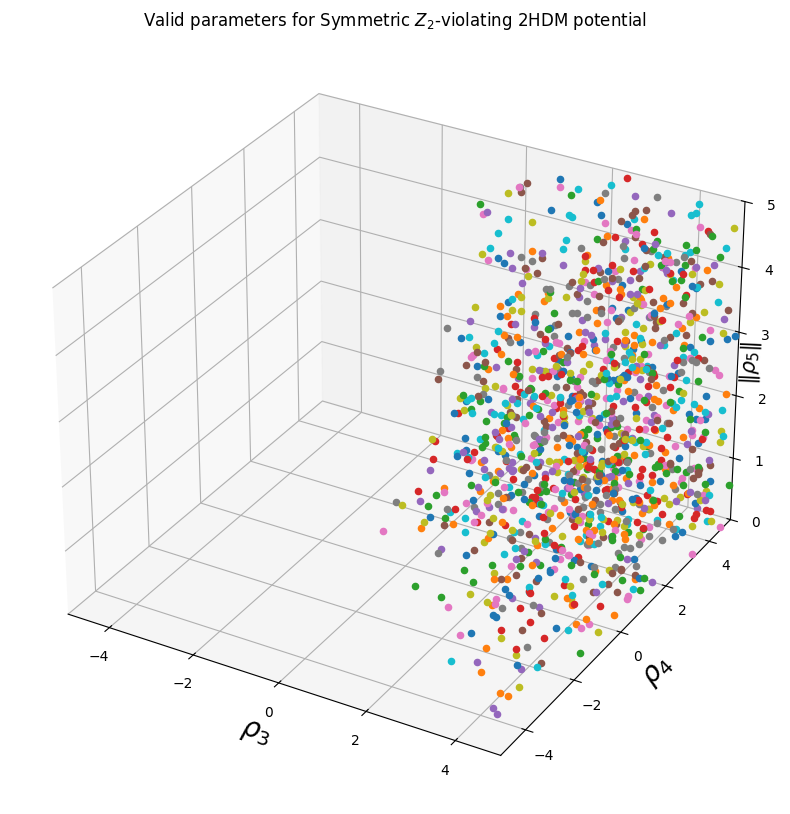

In [28]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(symmetric_valid_values)-1,len(symmetric_valid_values)):
    #
    ax.scatter(symmetric_valid_values[int(point)][0],symmetric_valid_values[int(point)][1],symmetric_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for Symmetric $Z_2$-violating 2HDM potential')

plt.show()

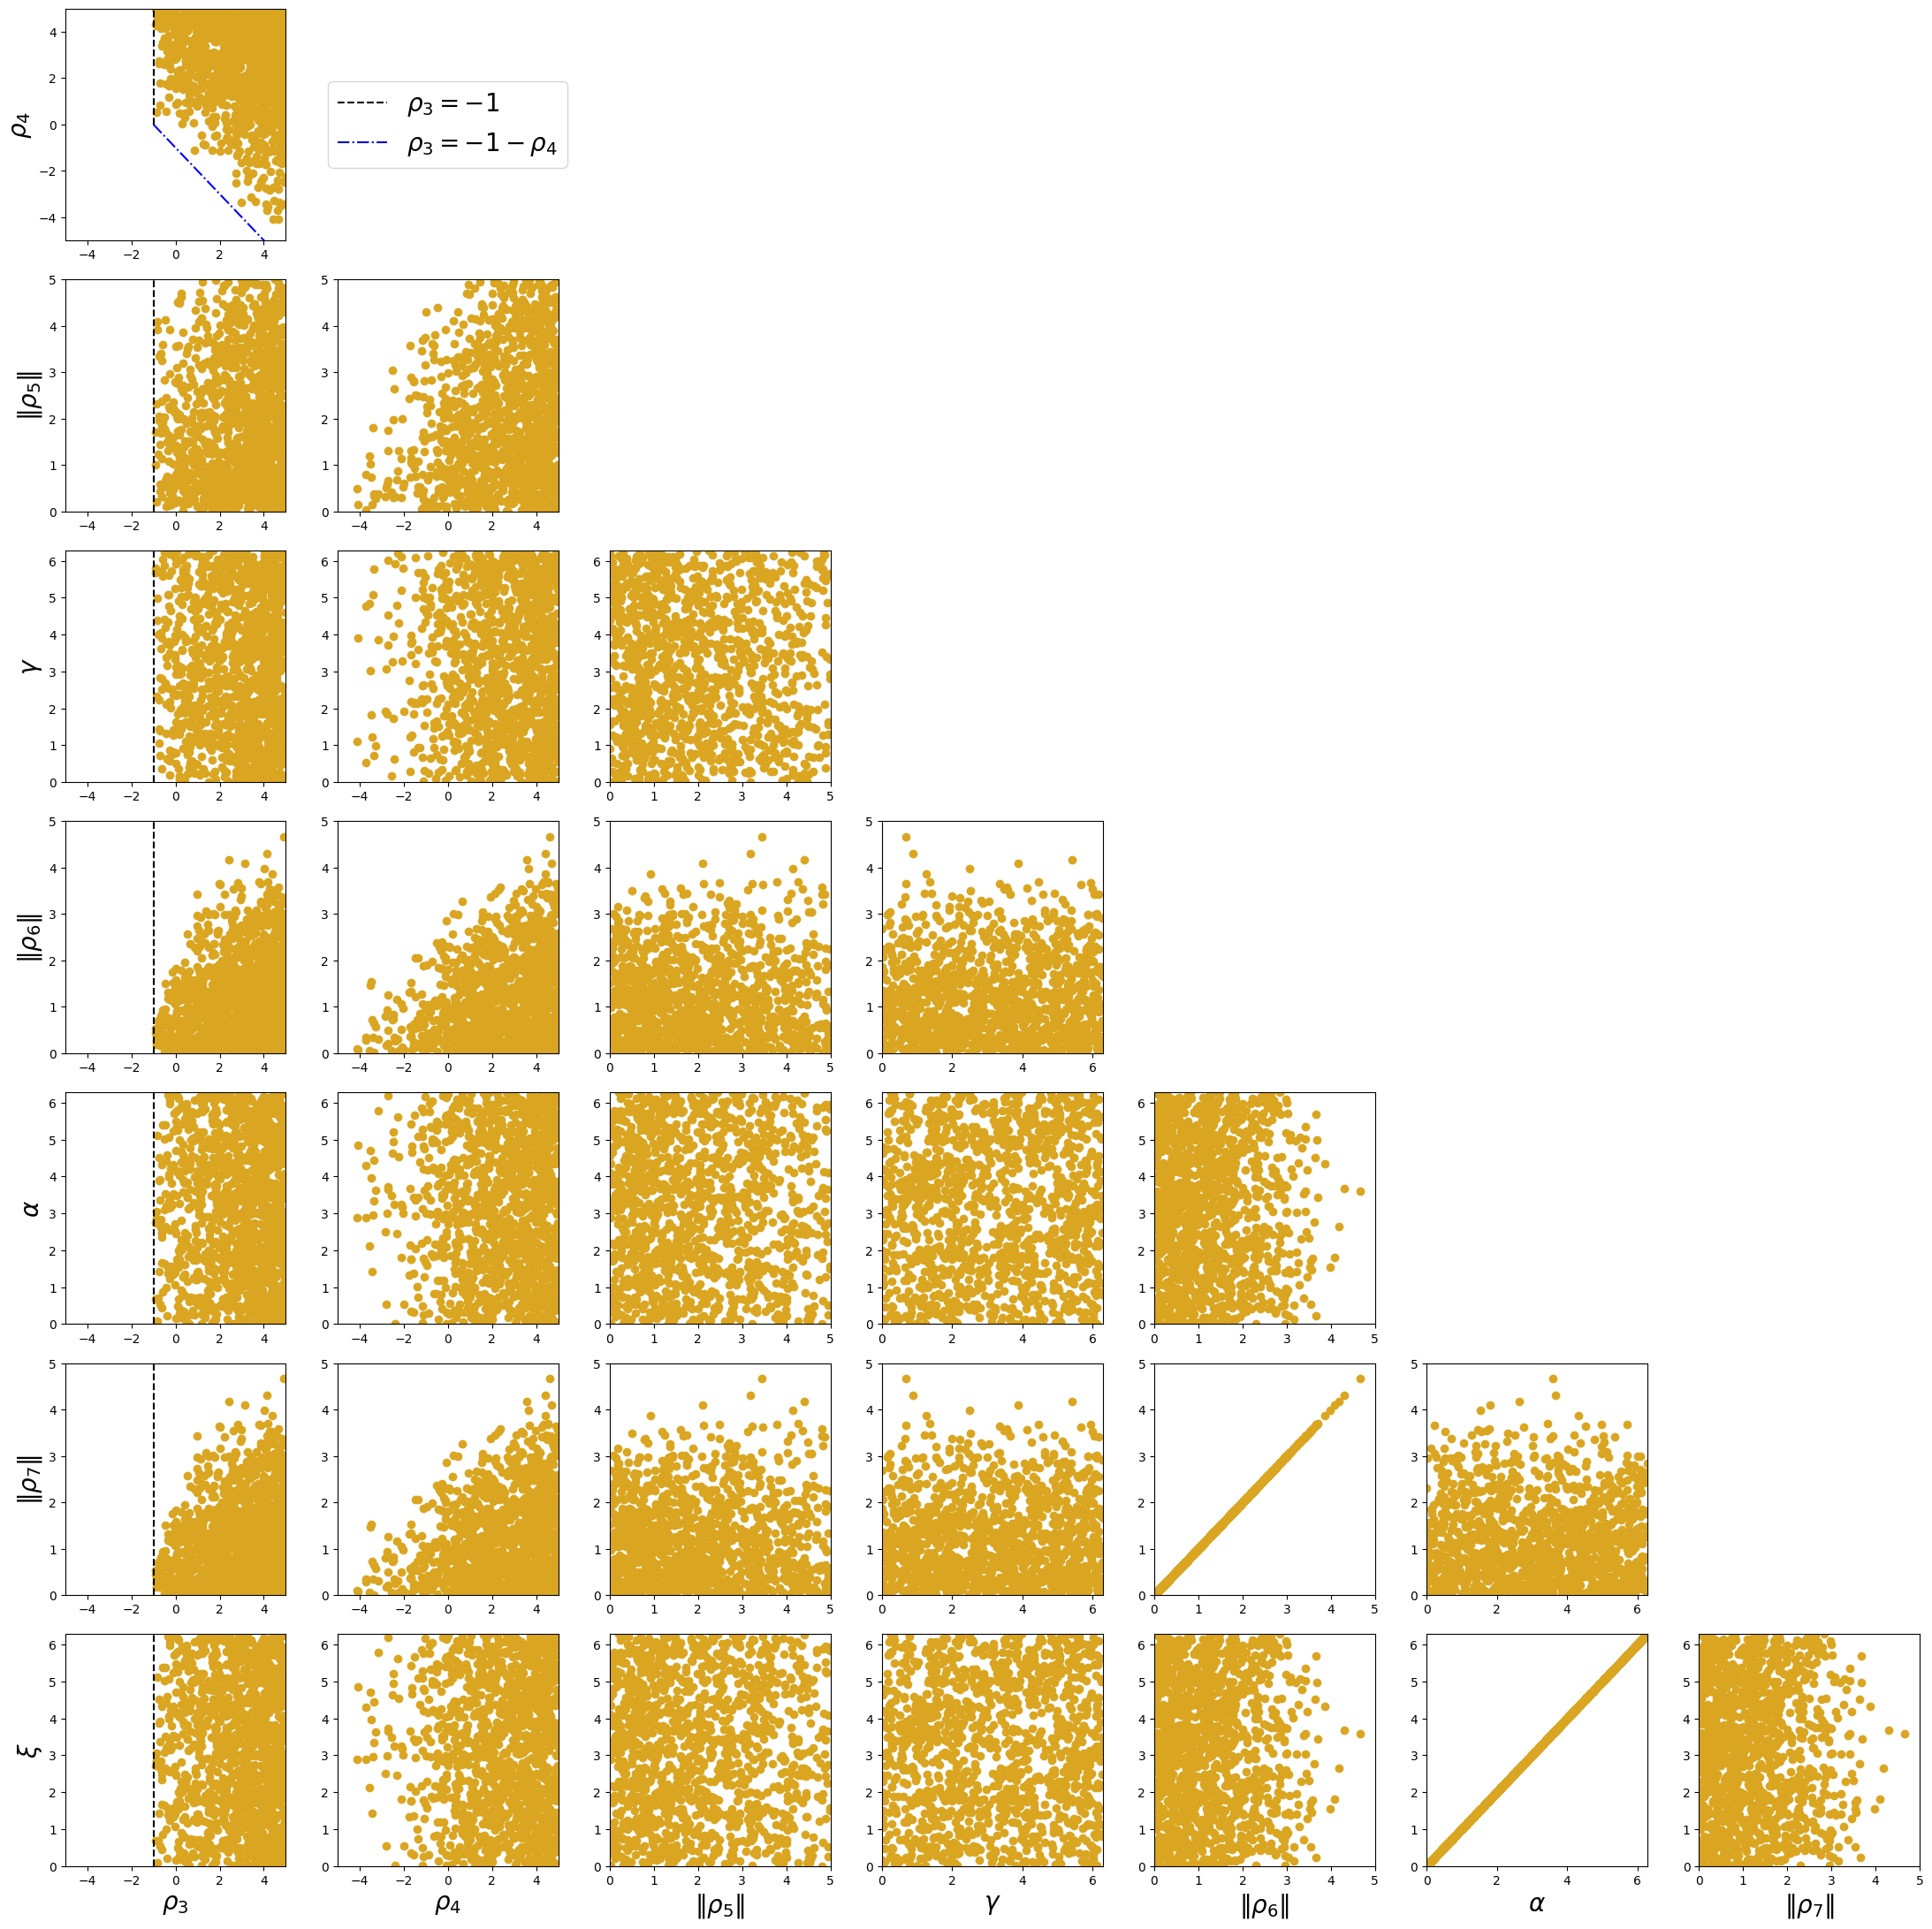

In [138]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

ax.scatter(symmetric_valid_values[:,0], symmetric_valid_values[:,1],color='goldenrod')

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

ax.scatter(symmetric_valid_values[:,0], symmetric_valid_values[:,2],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

ax.scatter(symmetric_valid_values[:,1], symmetric_valid_values[:,2],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

ax.scatter(symmetric_valid_values[:,0], symmetric_valid_values[:,3],color='goldenrod')

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

ax.scatter(symmetric_valid_values[:,1], symmetric_valid_values[:,3],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

ax.scatter(symmetric_valid_values[:,2], symmetric_valid_values[:,3],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

ax.scatter(symmetric_valid_values[:,0], symmetric_valid_values[:,4],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

ax.scatter(symmetric_valid_values[:,1], symmetric_valid_values[:,4],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

ax.scatter(symmetric_valid_values[:,2], symmetric_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

ax.scatter(symmetric_valid_values[:,3], symmetric_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

ax.scatter(symmetric_valid_values[:,0], symmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

ax.scatter(symmetric_valid_values[:,1], symmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

ax.scatter(symmetric_valid_values[:,2], symmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

ax.scatter(symmetric_valid_values[:,3], symmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

ax.scatter(symmetric_valid_values[:,4], symmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

ax.scatter(symmetric_valid_values[:,0], symmetric_valid_values[:,6],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

ax.scatter(symmetric_valid_values[:,1], symmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

ax.scatter(symmetric_valid_values[:,2], symmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

ax.scatter(symmetric_valid_values[:,3], symmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

ax.scatter(symmetric_valid_values[:,4], symmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

ax.scatter(symmetric_valid_values[:,5], symmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

ax.scatter(symmetric_valid_values[:,0], symmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

ax.scatter(symmetric_valid_values[:,1], symmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

ax.scatter(symmetric_valid_values[:,2], symmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

ax.scatter(symmetric_valid_values[:,3], symmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

ax.scatter(symmetric_valid_values[:,4], symmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

ax.scatter(symmetric_valid_values[:,5], symmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

ax.scatter(symmetric_valid_values[:,6], symmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='mediumblue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

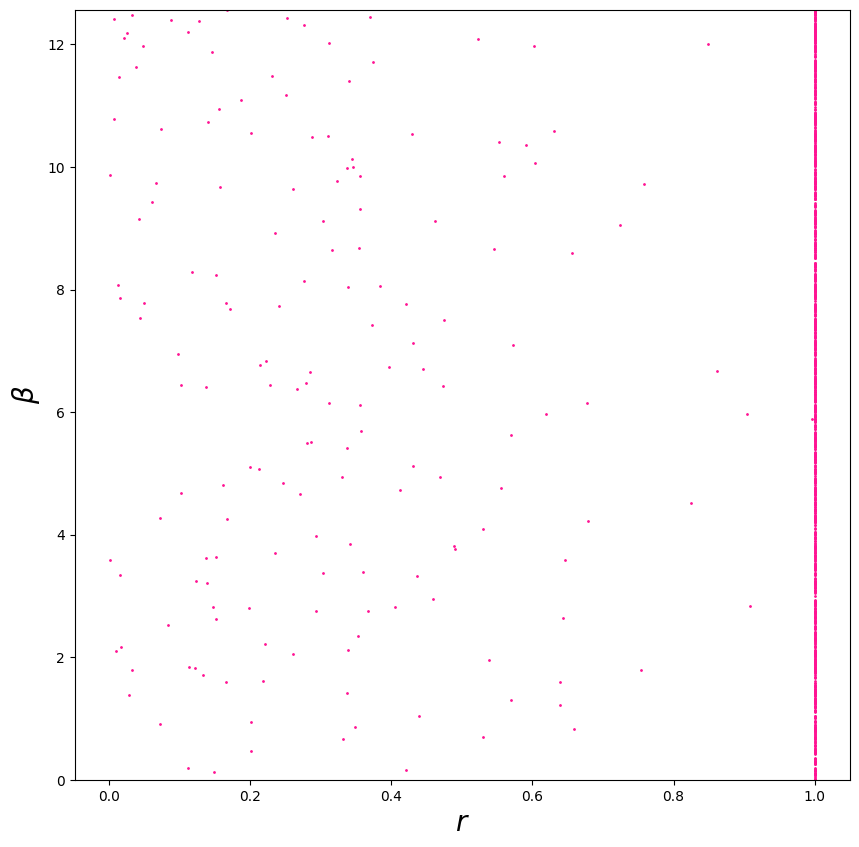

In [112]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1)

ax.scatter(symmetric_valid_values[:,8], symmetric_valid_values[:,9], color='deeppink', s=1)

ax.set_ylabel(r'$\beta$',fontsize=20)
ax.set_xlabel(r'$r$',fontsize=20)

ax.set_ylim([0, 4*np.pi])

plt.show()

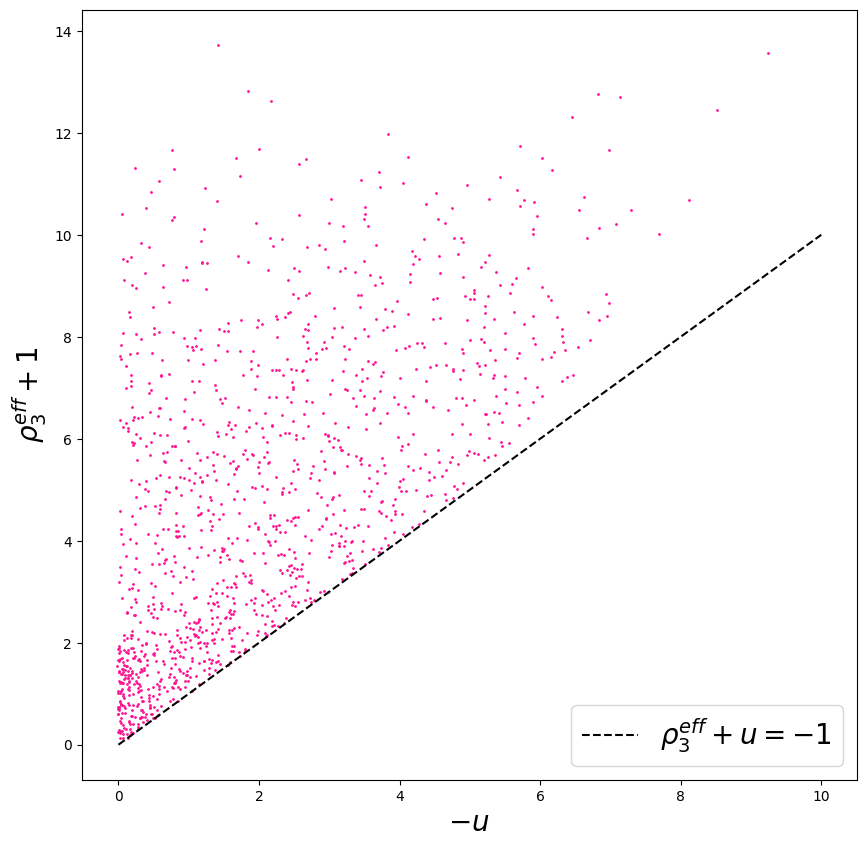

In [127]:
# Define effective parameters

rho_3_Z_2_violating_sym = symmetric_valid_values[:,0]
rho_4_Z_2_violating_sym = symmetric_valid_values[:,1]
rho_5_Z_2_violating_sym = symmetric_valid_values[:,2]
gamma_Z_2_violating_sym = symmetric_valid_values[:,3]
rho_6_Z_2_violating_sym = symmetric_valid_values[:,4]
alpha_Z_2_violating_sym = symmetric_valid_values[:,5]
rho_7_Z_2_violating_sym = symmetric_valid_values[:,6]
xi_Z_2_violating_sym = symmetric_valid_values[:,7]
r_sym = symmetric_valid_values[:,8]
beta_sym = symmetric_valid_values[:,9]

rho_3_eff_Z_2_violating_sym = rho_3_Z_2_violating_sym + r_sym**2*(rho_4_Z_2_violating_sym + rho_5_Z_2_violating_sym*np.cos(gamma_Z_2_violating_sym + beta_sym))

rho_6_eff_Z_2_violating_sym = rho_6_Z_2_violating_sym*r_sym*np.cos(alpha_Z_2_violating_sym + (1/2)*beta_sym)

rho_7_eff_Z_2_violating_sym = rho_7_Z_2_violating_sym*r_sym*np.cos(xi_Z_2_violating_sym + (1/2)*beta_sym)

u_Z_2_violating_sym = rho_6_eff_Z_2_violating_sym + rho_7_eff_Z_2_violating_sym

v_Z_2_violating_sym = rho_6_eff_Z_2_violating_sym - rho_7_eff_Z_2_violating_sym

x_var = np.linspace(0,10,1000)

plt.figure(figsize=(10,10))

plt.plot(x_var,x_var,color='black',linestyle='--',label=r'$\rho^{eff}_{3}+u=-1$')
plt.scatter(-u_Z_2_violating_sym,rho_3_eff_Z_2_violating_sym+1,color='deeppink',s=1)
plt.legend(loc=4,fontsize=20)
plt.ylabel(r'$\rho^{eff}_{3}+1$',fontsize=20)
plt.xlabel(r'$-u$',fontsize=20)
plt.show()

# Antisymmetric 2HDM potential

In [ ]:
# Explore Antisymmetric Z_2-violating 2HDM results

dim = 10000

regions = [(-5, 5),         # rho_3
           (-5, 5),         # rho_4
           (0, 5),          # |rho_5|
           (0, 2*np.pi),    # gamma
           (0, 5),          # |rho_6|
           (-np.pi, 2*np.pi),    # alpha (limits have been changed in order to visualize the results better. However, this does not change nothign because the potential is periodic in alpha)
           (0, 0),          # |rho_7| will be overwrtten by |rho_6|
           (0, 0)]          # xi will be overwritten by alpha


# Generate random parameters
parameters = generate_random_params(dim, regions)
parameters[:, 6] = parameters[:, 4]  # rho_7 = rho_6
parameters[:, 7] = parameters[:, 5] + np.pi  # xi = alpha+pi (this +pi is the reason why the limits of alpha have been changed)

# Minimize the function and filter the results with V > 0
results = np.array(minimize_dependent_params(parameters, function_variable_regions))
antisymmetric_valid_values = results[results[:, -1] > 0]

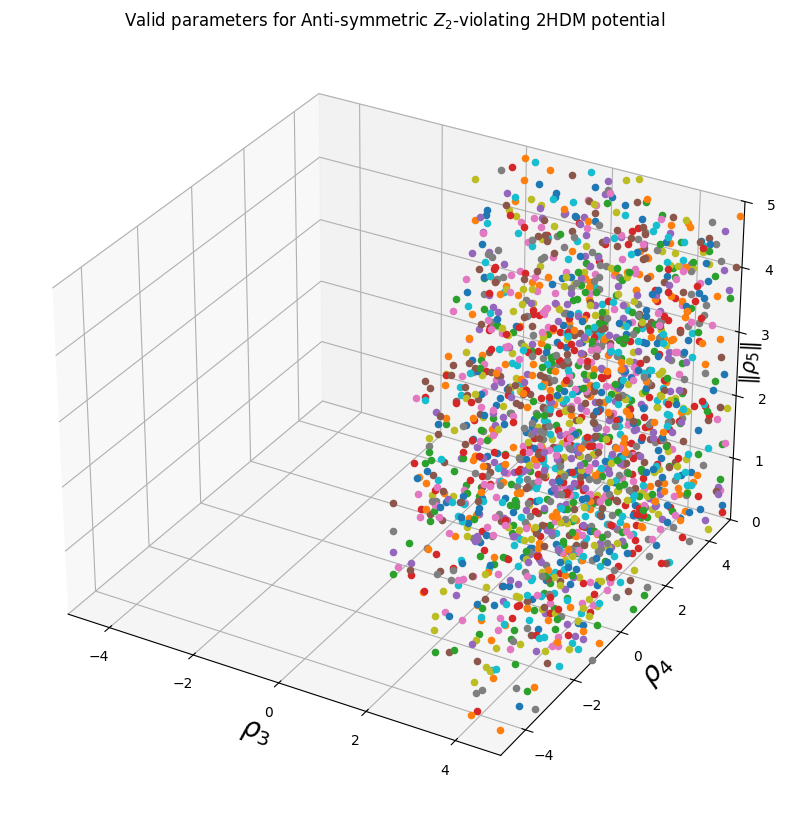

In [32]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(antisymmetric_valid_values)-1,len(antisymmetric_valid_values)):
    #
    ax.scatter(antisymmetric_valid_values[int(point)][0],antisymmetric_valid_values[int(point)][1],antisymmetric_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for Anti-symmetric $Z_2$-violating 2HDM potential')

plt.show()

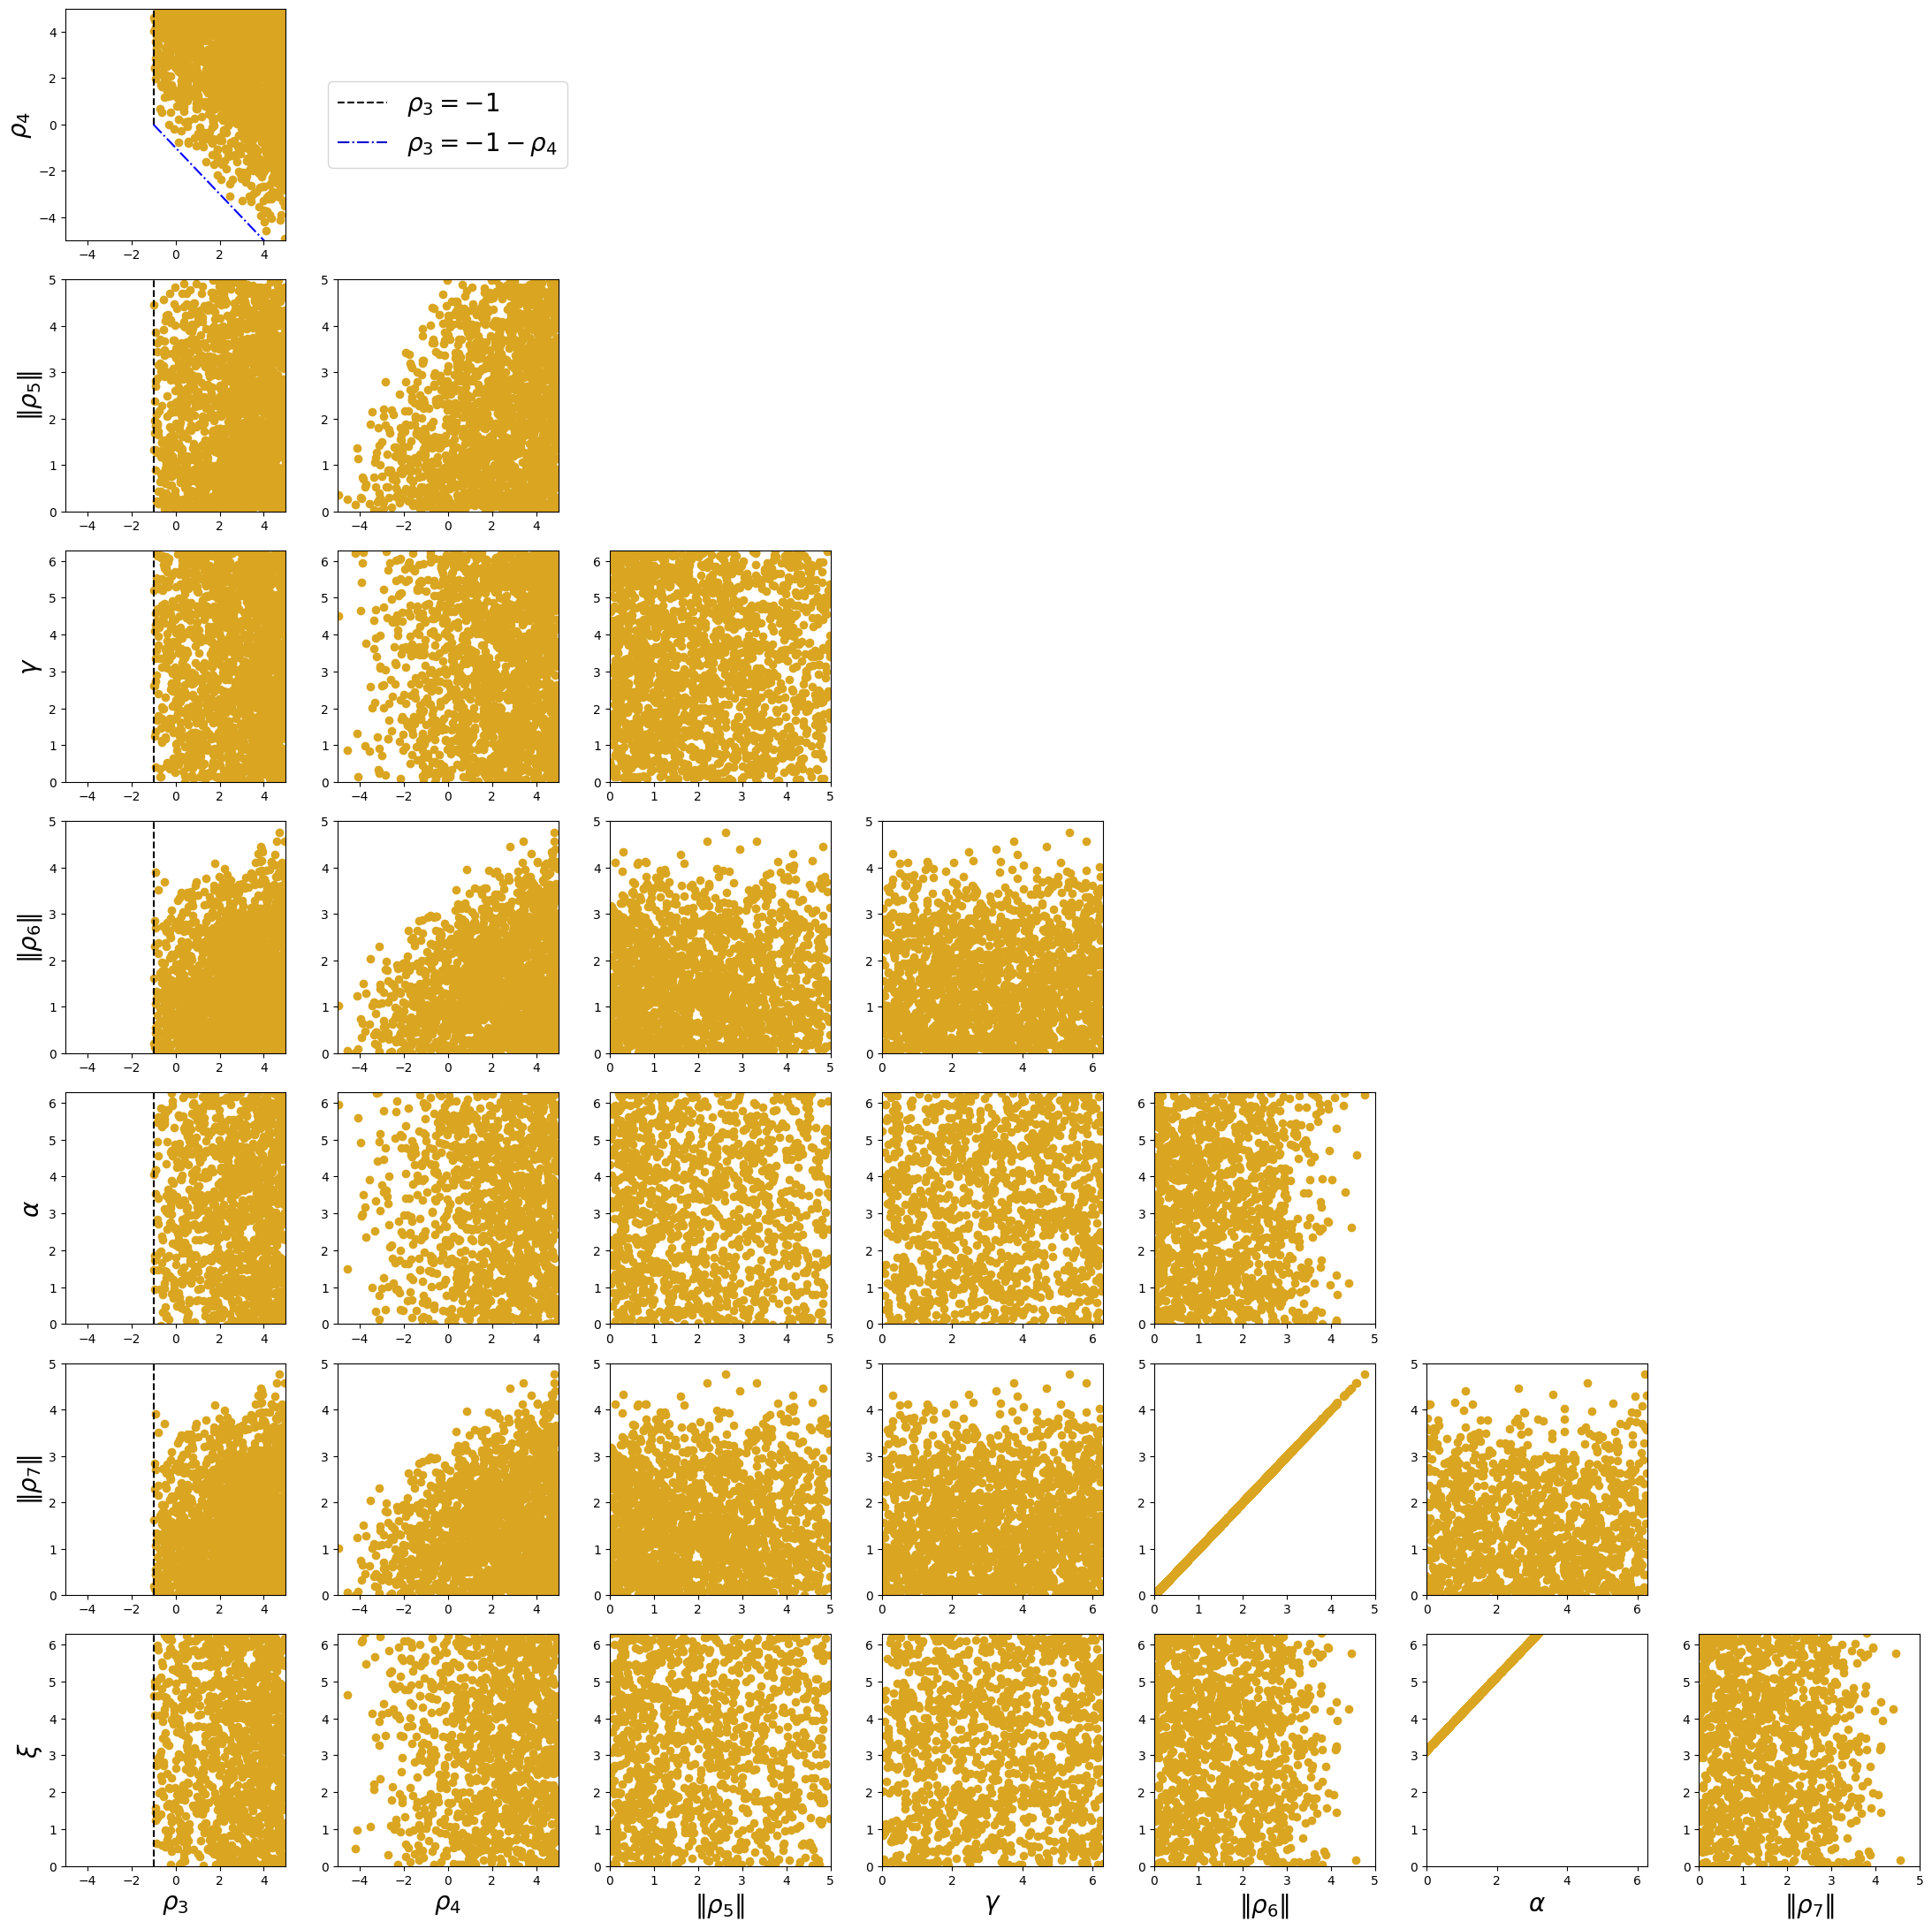

In [139]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

ax.scatter(antisymmetric_valid_values[:,0], antisymmetric_valid_values[:,1],color='goldenrod')

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

ax.scatter(antisymmetric_valid_values[:,0], antisymmetric_valid_values[:,2],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

ax.scatter(antisymmetric_valid_values[:,1], antisymmetric_valid_values[:,2],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

ax.scatter(antisymmetric_valid_values[:,0], antisymmetric_valid_values[:,3],color='goldenrod')

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

ax.scatter(antisymmetric_valid_values[:,1], antisymmetric_valid_values[:,3],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

ax.scatter(antisymmetric_valid_values[:,2], antisymmetric_valid_values[:,3],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

ax.scatter(antisymmetric_valid_values[:,0], antisymmetric_valid_values[:,4],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

ax.scatter(antisymmetric_valid_values[:,1], antisymmetric_valid_values[:,4],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

ax.scatter(antisymmetric_valid_values[:,2], antisymmetric_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

ax.scatter(antisymmetric_valid_values[:,3], antisymmetric_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

ax.scatter(antisymmetric_valid_values[:,0], antisymmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

ax.scatter(antisymmetric_valid_values[:,1], antisymmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

ax.scatter(antisymmetric_valid_values[:,2], antisymmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

ax.scatter(antisymmetric_valid_values[:,3], antisymmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

ax.scatter(antisymmetric_valid_values[:,4], antisymmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

ax.scatter(antisymmetric_valid_values[:,0], antisymmetric_valid_values[:,6],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

ax.scatter(antisymmetric_valid_values[:,1], antisymmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

ax.scatter(antisymmetric_valid_values[:,2], antisymmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

ax.scatter(antisymmetric_valid_values[:,3], antisymmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

ax.scatter(antisymmetric_valid_values[:,4], antisymmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

ax.scatter(antisymmetric_valid_values[:,5], antisymmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

ax.scatter(antisymmetric_valid_values[:,0], antisymmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

ax.scatter(antisymmetric_valid_values[:,1], antisymmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

ax.scatter(antisymmetric_valid_values[:,2], antisymmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

ax.scatter(antisymmetric_valid_values[:,3], antisymmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

ax.scatter(antisymmetric_valid_values[:,4], antisymmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

ax.scatter(antisymmetric_valid_values[:,5], antisymmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

ax.scatter(antisymmetric_valid_values[:,6], antisymmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='mediumblue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

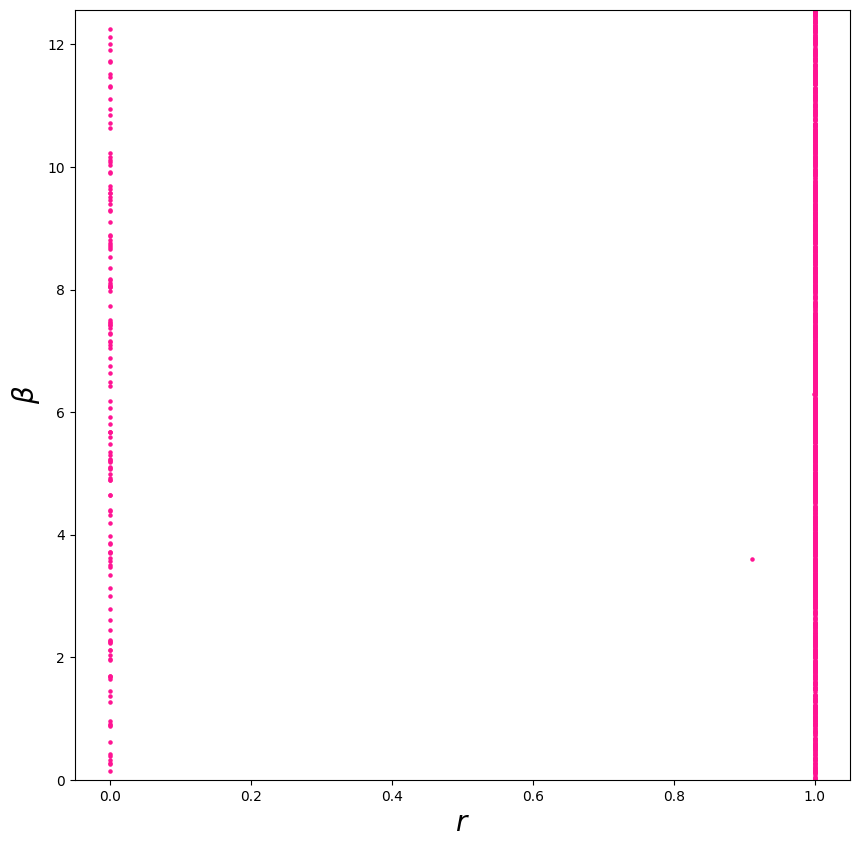

In [136]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1)

ax.scatter(antisymmetric_valid_values[:,8], antisymmetric_valid_values[:,9], color='deeppink',s=5)

ax.set_ylabel(r'$\beta$',fontsize=20)
ax.set_xlabel(r'$r$',fontsize=20)

ax.set_ylim([0, 4*np.pi])

plt.show()

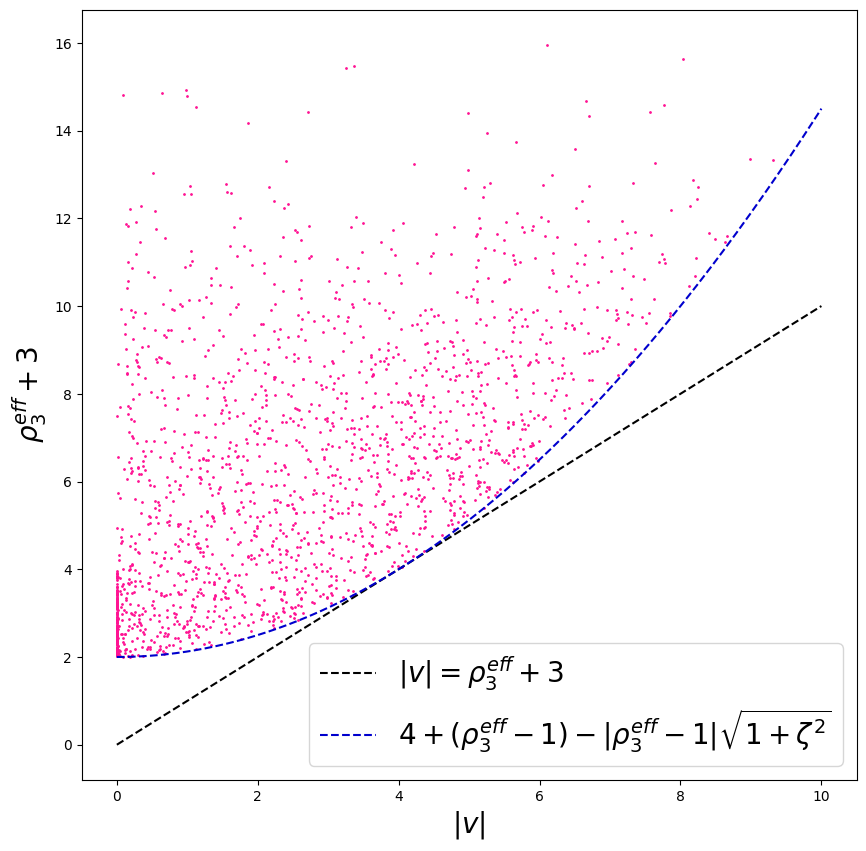

In [141]:
# Define effective parameters

rho_3_Z_2_violating_antisym = antisymmetric_valid_values[:,0]
rho_4_Z_2_violating_antisym = antisymmetric_valid_values[:,1]
rho_5_Z_2_violating_antisym = antisymmetric_valid_values[:,2]
gamma_Z_2_violating_antisym = antisymmetric_valid_values[:,3]
rho_6_Z_2_violating_antisym = antisymmetric_valid_values[:,4]
alpha_Z_2_violating_antisym = antisymmetric_valid_values[:,5]
rho_7_Z_2_violating_antisym = antisymmetric_valid_values[:,6]
xi_Z_2_violating_antisym = antisymmetric_valid_values[:,7]
r_antisym = antisymmetric_valid_values[:,8]
beta_antisym = antisymmetric_valid_values[:,9]

rho_3_eff_Z_2_violating_antisym = rho_3_Z_2_violating_antisym + r_antisym**2*(rho_4_Z_2_violating_antisym + rho_5_Z_2_violating_antisym*np.cos(gamma_Z_2_violating_antisym + beta_antisym))

rho_6_eff_Z_2_violating_antisym = rho_6_Z_2_violating_antisym*r_antisym*np.cos(alpha_Z_2_violating_antisym + (1/2)*beta_antisym)

rho_7_eff_Z_2_violating_antisym = rho_7_Z_2_violating_antisym*r_antisym*np.cos(xi_Z_2_violating_antisym + (1/2)*beta_antisym)

u_Z_2_violating_antisym = rho_6_eff_Z_2_violating_antisym + rho_7_eff_Z_2_violating_antisym

v_Z_2_violating_antisym = rho_6_eff_Z_2_violating_antisym - rho_7_eff_Z_2_violating_antisym

plt.figure(figsize=(10,10))

var_x = np.linspace(0,10,1000)
plt.plot(var_x,var_x, color='black',linestyle='--',label=r'$|v|=\rho^{eff}_{3}+3$')
plt.plot(var_x,(var_x**2-8)/8+3, color='mediumblue',linestyle='--',label=r'$4 + (\rho^{eff}_{3}-1) - |\rho^{eff}_{3}-1|\sqrt{1+\zeta^{2}}$')

plt.scatter(np.abs(v_Z_2_violating_antisym),rho_3_eff_Z_2_violating_antisym+3, color='deeppink',s=1)
plt.ylabel(r'$\rho^{eff}_{3}+3$',fontsize=20)
plt.xlabel(r'$|v|$',fontsize=20)
plt.legend(loc=4,fontsize=20)
plt.show()